# Classification du vin

L'objectif de ce premier exercice est de se familiariser avec un premier problème pouvant être résolu avec les méthodologies et techniques utilisées en machine learning.

## Visualisation des données

Les données utilisées pour ce premier exercice sont issues de l'UC Irvine Machine Learning Repository : https://archive.ics.uci.edu/ml/datasets/wine

Elles sont disponibles sur ce site, ou alors dans l'archive que vous avez téléchargée, dans le répertoire `snowcamp/wine/`

In [1]:
ls snowcamp/wine/

wine.data  wine.names


In [2]:
def read_first_lines(file_path, num_lines=10):
    """Read first lines of a given file
        
    # Arguments
        file_path : Full file path.
        num_lines: Number of lines to read.
        
    # Returns
        An array with first lines of the given file.
    """
    with open(file_path) as f:
        return [next(f) for x in range(num_lines)] if num_lines is not None else f.readlines()
    
def display_first_lines(file_path, num_lines=10):
    """Display first lines of a given file
        
    # Arguments
        file_path : Full file path.
        num_lines: Number of lines to read.
        
    # Returns
        An array with first lines of the given file.
    """
    for l in read_first_lines(file_path, num_lines):
        print(l)   
   
display_first_lines('snowcamp/wine/wine.data')


1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065

1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050

1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185

1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480

1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735

1,14.2,1.76,2.45,15.2,112,3.27,3.39,.34,1.97,6.75,1.05,2.85,1450

1,14.39,1.87,2.45,14.6,96,2.5,2.52,.3,1.98,5.25,1.02,3.58,1290

1,14.06,2.15,2.61,17.6,121,2.6,2.51,.31,1.25,5.05,1.06,3.58,1295

1,14.83,1.64,2.17,14,97,2.8,2.98,.29,1.98,5.2,1.08,2.85,1045

1,13.86,1.35,2.27,16,98,2.98,3.15,.22,1.85,7.22,1.01,3.55,1045



La documentation de ces données se trouve dans le fichier 

In [3]:
display_first_lines('snowcamp/wine/wine.names', None)

1. Title of Database: Wine recognition data

	Updated Sept 21, 1998 by C.Blake : Added attribute information



2. Sources:

   (a) Forina, M. et al, PARVUS - An Extendible Package for Data

       Exploration, Classification and Correlation. Institute of Pharmaceutical

       and Food Analysis and Technologies, Via Brigata Salerno, 

       16147 Genoa, Italy.



   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au

   (c) July 1991

3. Past Usage:



   (1)

   S. Aeberhard, D. Coomans and O. de Vel,

   Comparison of Classifiers in High Dimensional Settings,

   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of

   Mathematics and Statistics, James Cook University of North Queensland.

   (Also submitted to Technometrics).



   The data was used with many others for comparing various 

   classifiers. The classes are separable, though only RDA 

   has achieved 100% correct classification.

   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed dat

### Import des données avec la librairie pandas

Pandas est une librairie python permettant de charger des données, de les visualiser, de les transformer et de les décrire. 

Elle dispose de plusieurs fonctions utilitaires, comme la fonction read_csv permettant de charger les données dans un objet de 'type' dataframe.

In [4]:
import pandas as pd

columns = [ 'producer', 'alcohol', 
                                               'malic_acid', 'ash', 
                                               'ash_alcalinity', 
                                               'magnesium', 
                                               'total_phenols',
                                               'flavanoids', 'non_flavanoids_phenols', 
                                               'proanthocyanins', 'color_intensity', 'hue', 'od', 'proline']

wine_dataframe = pd.read_csv('snowcamp/wine/wine.data', names= columns)

"""Affichage des 10 premières lignes"""
wine_dataframe.head(10)

,producer,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,od,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


### Description des données

In [5]:
"""Description des données"""
wine_dataframe.describe()

,producer,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,od,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
"""Informations sur les données de la dataframe"""
wine_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
producer                  178 non-null int64
alcohol                   178 non-null float64
malic_acid                178 non-null float64
ash                       178 non-null float64
ash_alcalinity            178 non-null float64
magnesium                 178 non-null int64
total_phenols             178 non-null float64
flavanoids                178 non-null float64
non_flavanoids_phenols    178 non-null float64
proanthocyanins           178 non-null float64
color_intensity           178 non-null float64
hue                       178 non-null float64
od                        178 non-null float64
proline                   178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
"""Groupement par producteur"""
wine_per_producer_df = wine_dataframe.groupby('producer')

In [8]:
"""Moyenne des valeurs par producteur"""
wine_per_producer_df.mean()

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,od,proline
producer,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


### Visualisation des données (matplotlib)

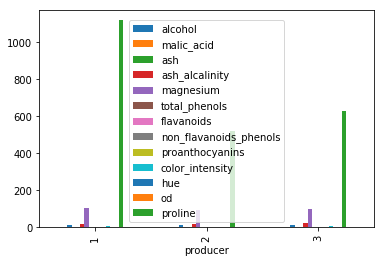

In [9]:
%matplotlib inline     

"""Affichage de toutes les données"""
wine_per_producer_df.mean().plot(kind='bar')

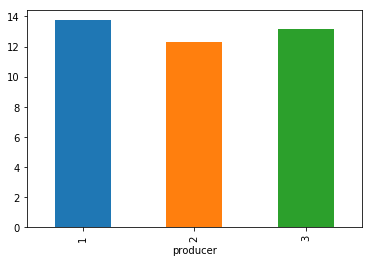

In [10]:
"""Affichage du degré d'alcool moyen par producteur"""
wine_per_producer_df.mean()['alcohol'].plot(kind='bar')

### Visualisation des données (matplotlib + seaborn)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

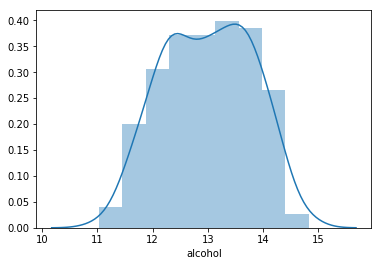

In [12]:
"""Distribution du taux d'alcool"""
sns.distplot(wine_dataframe.alcohol)
plt.show()

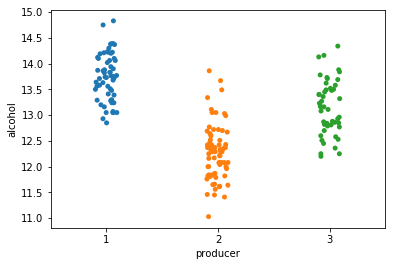

In [13]:
"""Strip plot du taux d'alcool par producteur"""
sns.stripplot(x="producer", y="alcohol", jitter=True, data=wine_dataframe);

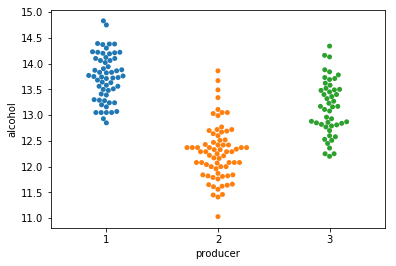

In [14]:
"""Swarm plot"""
sns.swarmplot(x="producer", y="alcohol", data=wine_dataframe);

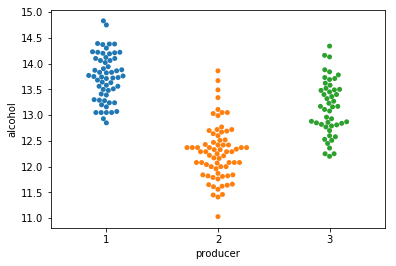

In [15]:
"""Swarm plot"""
sns.swarmplot(x="producer", y="alcohol", data=wine_dataframe);

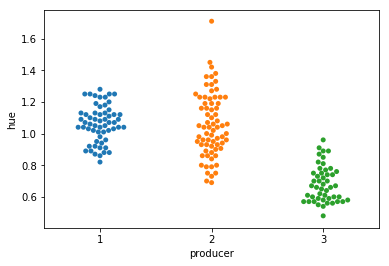

In [16]:
"""Swarm plot (intensité)"""
sns.swarmplot(x="producer", y="hue", data=wine_dataframe);

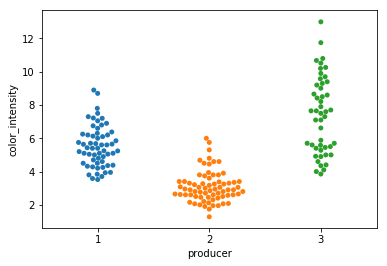

In [17]:
"""Swarm plot (couleur)"""
sns.swarmplot(x="producer", y="color_intensity", data=wine_dataframe);

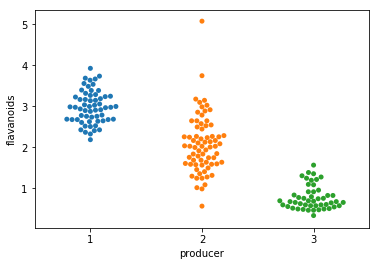

In [18]:
"""Swarm plot (flavanoid)"""
sns.swarmplot(x="producer", y="flavanoids", data=wine_dataframe);

## Machine Learning !

Notre objectif est de créer un modèle qui aura appris, en fonction des données existantes, à catégoriser les vins selon leur producteur. Plusieurs algorithmes de machine learning existent pour résoudre les problèmes de classification. Nous allons utiliser pour cet exercice un réseau de neurones, avec la librairie Keras.

### Préparation des données

Avant d'implémenter notre premier réseau de neurones, nous devons préparer les données. Notamment, séparer notre dataframe en 2 nouvelles dataframes:
* Une dataframe avec les attributs (features) : dataframe qui contiendra uniquement les caractéristiques des vins.
* Une dataframe qui contiendra la cible (target) : une dataframe qui contiendra uniquement les producteurs


In [19]:
X = wine_dataframe.drop(columns=['producer'])
y = wine_dataframe[['producer']]

In [20]:
X.head()

,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,non_flavanoids_phenols,proanthocyanins,color_intensity,hue,od,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [21]:
y.head()

,producer
0,1
1,1
2,1
3,1
4,1


### One hot encoding

La valeur donnée pour chaque producteur n'est pas à proprement parler une valeur qui le caractérise (une valeur continue et ordonnée) mais plutôt un code donné arbitrairement.

Il est donc nécessaire de transformer ces données, les encoder en catégories.

Nous disposons de 3 catégories (3 producteurs). Le premier  producteur pourrait être encodé de cette manière:

> Producteur 1 = [1, 0, 0]

Le second : 

> Producteur 2 = [0, 1, 0]

Et le troisième : 

> Producteur 3 = [0, 0, 1]

In [22]:
y_cat = pd.get_dummies(y, columns=['producer'])
y_cat

,producer_1,producer_2,producer_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [23]:
"""Import des librairies Keras utilisées pour construire notre modèle"""
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Définition d'un modèle

Il existe 2 méthodes pour définir un modèle avec Keras:

* L'API de modélisation séquentielle : permet de définir une pile de couches (layers) de façon linéaire
* L'API fonctionnelle (Functional) : permet de définir des modèles plus complexes (graphes notamment)



Création d'un modèle séquentiel

In [25]:
model = Sequential()

### Les différentes couches

Différentes couches peuvent être utilisées avec Keras.

Les couches "core" : 
* Dense : Une couche entièrement connectée (à la couche précédente). Couche de base d'un réseau de neurones.
* Activation : Applique une fonction d'activation (voir plus bas).
* Dropout : Supprime volontairement des données, de manière arbitraire. Pour éviter le surapprentissage (mauvaise généralisation du modèle).
* Flatten : Réduit le nombre de dimensions. Par ex. : (None, 64, 32, 32) => (None, 65536)

D'autres couches existent également : 
Masking, Permute, Reshape, etc. (https://keras.io/layers/core)


Ajout d'une couche cachée (hidden layer) de 16 neurones, avec un biais et des poids initialisés de manière uniforme. Cette couche sera connectée à nos attributs caractérisant le vin.

In [26]:
model.add(Dense(16, input_dim = 13, kernel_initializer='uniform', use_bias=True))

### Les fonctions d'activation

On applique une fonction d'activation. Plusieurs fonctions d'activations sont disponibles. Elles permettent par exemple d'introduire de la non-linéarité dans les modèles (comme 'relu') ou de transformer les valeurs des sorties des neurones (pour ramener les valeurs sur une autre échelle comme 'softmax')

Ici, on ajouter une couche d'activation 'relu' à notre modèle.

In [27]:
model.add(Activation('relu'))

On ajoute une couche 'Dropout' pour valeur 0.1 (supprimera 10% des données en entrée de la dernière couche)

In [28]:
model.add(Dropout(0.1))

On ajoute une couche de sortie, avec 3 neurones (1 par producteur) et une couche d'activation ('softmax')

In [29]:
model.add(Dense(3, kernel_initializer='uniform', activation='softmax'))


### Compilation du modèle

On compile notre modèle, en utilisant une fonction de coût 'categorical_crossentropy' et l'optimizer 'adam'.
On utilisera la métrique 'accuracy' afind de visualiser la performance de notre modèle.


In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Affichage de l'architecture du modèle

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                224       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 275
Trainable params: 275
Non-trainable params: 0
_________________________________________________________________


## Entrainement du modèle

Pour entrainer notre modèle, on divisera nos données en 2 parties: 80% des données vont servir à entrainer le modèle, les 20% restant serviront à l'évaluer. 

In [32]:
model.fit(X, y_cat, epochs=500, validation_split=.20)

Train on 142 samples, validate on 36 samples
Epoch 1/500
142/142 [==============================] - 0s 1ms/step - loss: 3.7137 - acc: 0.4930 - val_loss: 1.5632 - val_acc: 0.0000e+00
Epoch 2/500
142/142 [==============================] - 0s 51us/step - loss: 2.3873 - acc: 0.4507 - val_loss: 1.3531 - val_acc: 0.0000e+00
Epoch 3/500
142/142 [==============================] - 0s 49us/step - loss: 1.4054 - acc: 0.4366 - val_loss: 1.5397 - val_acc: 0.0000e+00
Epoch 4/500
142/142 [==============================] - 0s 51us/step - loss: 1.0544 - acc: 0.3521 - val_loss: 2.0386 - val_acc: 0.0000e+00
Epoch 5/500
142/142 [==============================] - 0s 51us/step - loss: 1.0619 - acc: 0.4296 - val_loss: 2.3704 - val_acc: 0.0000e+00
Epoch 6/500
142/142 [==============================] - 0s 48us/step - loss: 1.0556 - acc: 0.4296 - val_loss: 2.4682 - val_acc: 0.0000e+00
Epoch 7/500
142/142 [==============================] - 0s 80us/step - loss: 0.9715 - acc: 0.4507 - val_loss: 2.4556 - val_acc: 0

Epoch 60/500
142/142 [==============================] - 0s 58us/step - loss: 0.5082 - acc: 0.8099 - val_loss: 2.1455 - val_acc: 0.0000e+00
Epoch 61/500
142/142 [==============================] - 0s 51us/step - loss: 0.5338 - acc: 0.8028 - val_loss: 2.0935 - val_acc: 0.0000e+00
Epoch 62/500
142/142 [==============================] - 0s 63us/step - loss: 0.5227 - acc: 0.7958 - val_loss: 2.0479 - val_acc: 0.0000e+00
Epoch 63/500
142/142 [==============================] - 0s 50us/step - loss: 0.5066 - acc: 0.8169 - val_loss: 1.9760 - val_acc: 0.0000e+00
Epoch 64/500
142/142 [==============================] - 0s 60us/step - loss: 0.5451 - acc: 0.7958 - val_loss: 1.9748 - val_acc: 0.0000e+00
Epoch 65/500
142/142 [==============================] - 0s 46us/step - loss: 0.4959 - acc: 0.8239 - val_loss: 2.0040 - val_acc: 0.0000e+00
Epoch 66/500
142/142 [==============================] - 0s 59us/step - loss: 0.4890 - acc: 0.8310 - val_loss: 2.0390 - val_acc: 0.0000e+00
Epoch 67/500
142/142 [=====

142/142 [==============================] - 0s 63us/step - loss: 0.4094 - acc: 0.8451 - val_loss: 1.8709 - val_acc: 0.0000e+00
Epoch 119/500
142/142 [==============================] - 0s 47us/step - loss: 0.4156 - acc: 0.8451 - val_loss: 1.8488 - val_acc: 0.0000e+00
Epoch 120/500
142/142 [==============================] - 0s 58us/step - loss: 0.4416 - acc: 0.8380 - val_loss: 1.9109 - val_acc: 0.0000e+00
Epoch 121/500
142/142 [==============================] - 0s 45us/step - loss: 0.4407 - acc: 0.8239 - val_loss: 1.9250 - val_acc: 0.0000e+00
Epoch 122/500
142/142 [==============================] - 0s 62us/step - loss: 0.4258 - acc: 0.8451 - val_loss: 2.0462 - val_acc: 0.0000e+00
Epoch 123/500
142/142 [==============================] - 0s 46us/step - loss: 0.4413 - acc: 0.8310 - val_loss: 2.0727 - val_acc: 0.0000e+00
Epoch 124/500
142/142 [==============================] - 0s 58us/step - loss: 0.4183 - acc: 0.8451 - val_loss: 2.0358 - val_acc: 0.0000e+00
Epoch 125/500
142/142 [===========

142/142 [==============================] - 0s 49us/step - loss: 0.3906 - acc: 0.8451 - val_loss: 1.8053 - val_acc: 0.0000e+00
Epoch 177/500
142/142 [==============================] - 0s 49us/step - loss: 0.3787 - acc: 0.8662 - val_loss: 1.8472 - val_acc: 0.0000e+00
Epoch 178/500
142/142 [==============================] - 0s 47us/step - loss: 0.3906 - acc: 0.8521 - val_loss: 1.7874 - val_acc: 0.0000e+00
Epoch 179/500
142/142 [==============================] - 0s 62us/step - loss: 0.3803 - acc: 0.8380 - val_loss: 1.7398 - val_acc: 0.0000e+00
Epoch 180/500
142/142 [==============================] - 0s 69us/step - loss: 0.3751 - acc: 0.8451 - val_loss: 1.6933 - val_acc: 0.0000e+00
Epoch 181/500
142/142 [==============================] - 0s 47us/step - loss: 0.3754 - acc: 0.8451 - val_loss: 1.6703 - val_acc: 0.0000e+00
Epoch 182/500
142/142 [==============================] - ETA: 0s - loss: 0.4073 - acc: 0.843 - 0s 52us/step - loss: 0.3854 - acc: 0.8521 - val_loss: 1.6395 - val_acc: 0.0000e

142/142 [==============================] - 0s 61us/step - loss: 0.3601 - acc: 0.8451 - val_loss: 1.4811 - val_acc: 0.0000e+00
Epoch 235/500
142/142 [==============================] - 0s 50us/step - loss: 0.3279 - acc: 0.8451 - val_loss: 1.4139 - val_acc: 0.1389
Epoch 236/500
142/142 [==============================] - 0s 55us/step - loss: 0.3454 - acc: 0.8592 - val_loss: 1.3585 - val_acc: 0.1389
Epoch 237/500
142/142 [==============================] - 0s 50us/step - loss: 0.3269 - acc: 0.8521 - val_loss: 1.3524 - val_acc: 0.0556
Epoch 238/500
142/142 [==============================] - 0s 57us/step - loss: 0.3167 - acc: 0.8592 - val_loss: 1.3415 - val_acc: 0.0556
Epoch 239/500
142/142 [==============================] - 0s 49us/step - loss: 0.3246 - acc: 0.8662 - val_loss: 1.2942 - val_acc: 0.1667
Epoch 240/500
142/142 [==============================] - 0s 58us/step - loss: 0.3046 - acc: 0.8662 - val_loss: 1.3348 - val_acc: 0.1667
Epoch 241/500
142/142 [==============================] - 0

142/142 [==============================] - 0s 60us/step - loss: 0.2625 - acc: 0.8803 - val_loss: 1.0156 - val_acc: 0.5556
Epoch 295/500
142/142 [==============================] - 0s 45us/step - loss: 0.2745 - acc: 0.8873 - val_loss: 1.0190 - val_acc: 0.5000
Epoch 296/500
142/142 [==============================] - 0s 52us/step - loss: 0.2627 - acc: 0.8732 - val_loss: 0.8342 - val_acc: 0.6667
Epoch 297/500
142/142 [==============================] - 0s 53us/step - loss: 0.2645 - acc: 0.9014 - val_loss: 0.7833 - val_acc: 0.7500
Epoch 298/500
142/142 [==============================] - 0s 62us/step - loss: 0.3104 - acc: 0.8662 - val_loss: 0.8893 - val_acc: 0.5833
Epoch 299/500
142/142 [==============================] - 0s 42us/step - loss: 0.2720 - acc: 0.8873 - val_loss: 0.9492 - val_acc: 0.5556
Epoch 300/500
142/142 [==============================] - 0s 58us/step - loss: 0.2820 - acc: 0.8873 - val_loss: 0.7958 - val_acc: 0.7222
Epoch 301/500
142/142 [==============================] - 0s 47

142/142 [==============================] - 0s 57us/step - loss: 0.1942 - acc: 0.9648 - val_loss: 0.4543 - val_acc: 0.9167
Epoch 355/500
142/142 [==============================] - 0s 45us/step - loss: 0.2618 - acc: 0.9014 - val_loss: 0.4787 - val_acc: 0.9167
Epoch 356/500
142/142 [==============================] - 0s 62us/step - loss: 0.2154 - acc: 0.9296 - val_loss: 0.5329 - val_acc: 0.9167
Epoch 357/500
142/142 [==============================] - 0s 44us/step - loss: 0.2227 - acc: 0.9225 - val_loss: 0.5811 - val_acc: 0.7778
Epoch 358/500
142/142 [==============================] - 0s 60us/step - loss: 0.2349 - acc: 0.9085 - val_loss: 0.5815 - val_acc: 0.8333
Epoch 359/500
142/142 [==============================] - 0s 43us/step - loss: 0.2357 - acc: 0.9155 - val_loss: 0.5086 - val_acc: 0.9167
Epoch 360/500
142/142 [==============================] - 0s 55us/step - loss: 0.2115 - acc: 0.9296 - val_loss: 0.4761 - val_acc: 0.8889
Epoch 361/500
142/142 [==============================] - 0s 49

142/142 [==============================] - 0s 52us/step - loss: 0.1760 - acc: 0.9437 - val_loss: 0.3651 - val_acc: 0.9167
Epoch 415/500
142/142 [==============================] - 0s 48us/step - loss: 0.1785 - acc: 0.9577 - val_loss: 0.3348 - val_acc: 0.9167
Epoch 416/500
142/142 [==============================] - 0s 53us/step - loss: 0.1854 - acc: 0.9437 - val_loss: 0.4328 - val_acc: 0.9167
Epoch 417/500
142/142 [==============================] - 0s 52us/step - loss: 0.1800 - acc: 0.9366 - val_loss: 0.3979 - val_acc: 0.9167
Epoch 418/500
142/142 [==============================] - 0s 52us/step - loss: 0.2030 - acc: 0.9296 - val_loss: 0.3685 - val_acc: 0.9167
Epoch 419/500
142/142 [==============================] - 0s 53us/step - loss: 0.1821 - acc: 0.9648 - val_loss: 0.3523 - val_acc: 0.9167
Epoch 420/500
142/142 [==============================] - 0s 48us/step - loss: 0.1664 - acc: 0.9577 - val_loss: 0.3583 - val_acc: 0.9167
Epoch 421/500
142/142 [==============================] - 0s 49

142/142 [==============================] - 0s 46us/step - loss: 0.1718 - acc: 0.9366 - val_loss: 0.2755 - val_acc: 0.9167
Epoch 475/500
142/142 [==============================] - 0s 52us/step - loss: 0.1667 - acc: 0.9577 - val_loss: 0.2316 - val_acc: 0.9444
Epoch 476/500
142/142 [==============================] - 0s 51us/step - loss: 0.1878 - acc: 0.9225 - val_loss: 0.2587 - val_acc: 0.9167
Epoch 477/500
142/142 [==============================] - 0s 47us/step - loss: 0.2091 - acc: 0.9296 - val_loss: 0.3198 - val_acc: 0.9167
Epoch 478/500
142/142 [==============================] - 0s 53us/step - loss: 0.1815 - acc: 0.9296 - val_loss: 0.2442 - val_acc: 0.9167
Epoch 479/500
142/142 [==============================] - 0s 53us/step - loss: 0.1715 - acc: 0.9577 - val_loss: 0.2547 - val_acc: 0.9167
Epoch 480/500
142/142 [==============================] - 0s 47us/step - loss: 0.1609 - acc: 0.9507 - val_loss: 0.2782 - val_acc: 0.9167
Epoch 481/500
142/142 [==============================] - 0s 48

### Quelques prédictions

In [34]:
import numpy as np

In [35]:
new_wine_1 = [[13.48,1.67,2.64,22.5,89,2.6,1.1,.52,2.29,11.75,.57,1.78,620]]
model.predict(np.array(new_wine_1))

array([[0.08925758, 0.03044952, 0.88029283]], dtype=float32)

In [34]:
new_wine_2 = [[12.08,1.13,2.51,24,78,2,1.58,.4,1.4,2.2,1.31,2.72,630]]
model.predict_classes(np.array(new_wine_2))


array([1])